# Use of XGBoost regression model to predict the bike count required at each hour for the stable supply of rental bikes.

### **Data Description**

###  The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

*  Date : dd/mm/yyyy
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
*  Functional Day - No(Non Functional Hours), Yes(Functional hours)

## a. Data preprocessing

1. Import modules and load data.
2. Feature engineering
  * Checked for null and duplicates in the data.
  * Added weekend data, month data.
  * Identified the datatypes.
  * Checked whether all int/float datatypes falls into numerical feature category.
  * Seperated features into numerical and categorical.



In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('SeoulBikeData.csv')
data
data = data[data['Functioning Day'] == 'Yes']
data = data.drop('Functioning Day', axis = 1)

In [ ]:
data.duplicated().sum()
# No Duplicate rows .
# no Null values in the data in any column .
data.isnull().sum()


0

In [4]:
# add a weekend column
data['Weekend'] = data['Date'].apply(lambda x : 1 if pd.to_datetime(x).weekday() in [5,6] else 0)

# add a month column
data['Month'] = data['Date'].apply(lambda x : pd.to_datetime(x).month)

# 'Date' column is acting like an index column nothing more .
data = data.drop('Date', axis = 1) 


In [ ]:
# check for datatypes of each column
dtypes = data.dtypes 
numerical_features = ["Rented Bike Count", "Humidity(%)", "Visibility (10m)", "Temperature(C)", "Wind speed (m/s)", "Dew point temperature(C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)"]
categorical_features = ["Seasons", "Holiday", "Weekend", "Month"]


## b.  Data visualization and encoding

1. Visualized how the rented bike count varies hourly for different categorical features.
2. Visualized the rented bike count outliers for each categorical features.
3. Viualtized the variation in the data distribution for each numerical features. Also, mark/show the mean and median of the distibution in the plot.
4. Visualized the outliers in each numerical feature data.
5. created a regression plot to know relation between dependent and independent nuumerical variables.
6. Visualized the correlation between different numerical features using heat map. Find and remove correlated features for a threshold value of 0.7 (correlation>0.7).
7. Encoding categorical features (**Use of pipelines**).
  * One-hot encoding for seasons.
  * Numerical encoding (1 or 0) for categorical features with 2 unique values.
  * Used numerical identifier for other categorical features (eg. month: January-1, march-3)
8. Deleted non-relevant feautes from the dataframe and comment.
9. Visualized the dependent variable data-distribution and check for skewness. The regression assumes that the dependent variable has a nearly normal distribution, therefore, to meet this assumption, make some measures to normalize the distribution.

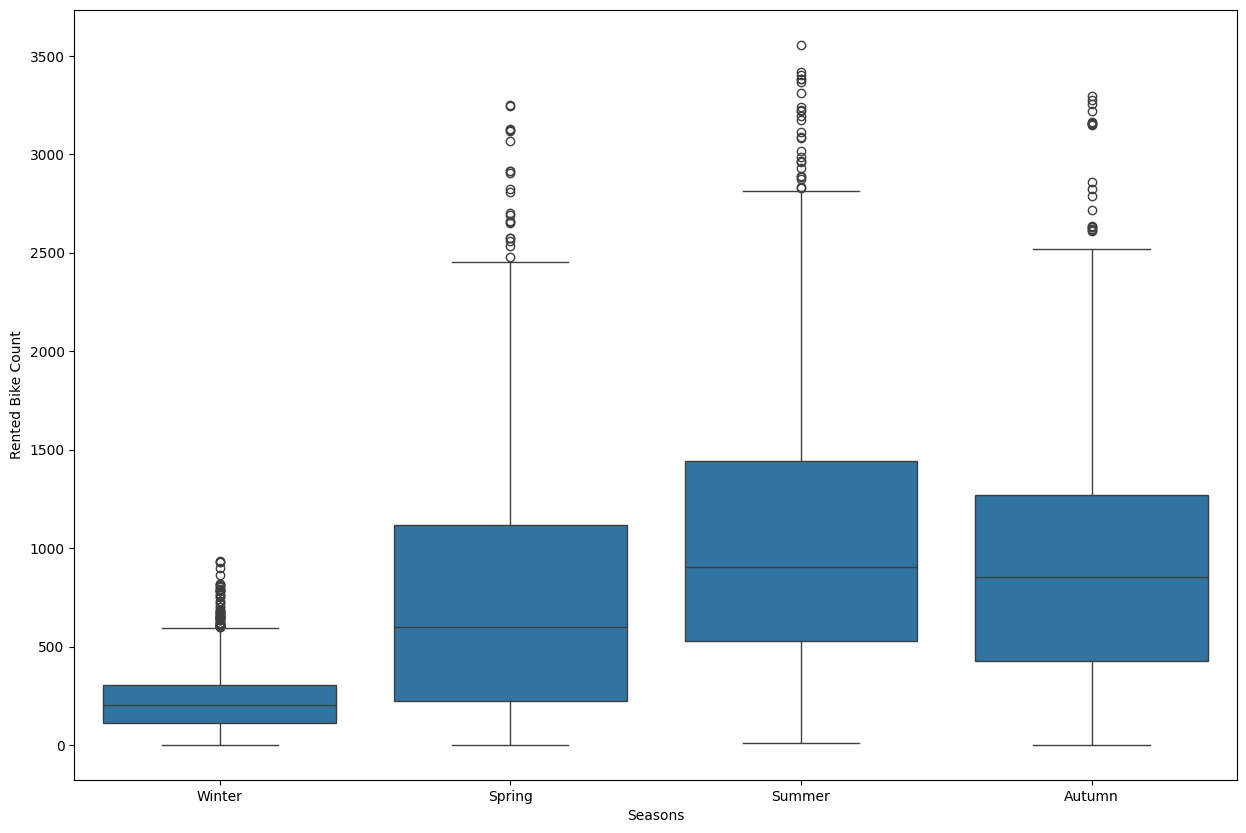

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.boxplot(x="Seasons",y='Rented Bike Count',data=data) # helps in finding outliers .
plt.show()

##### -> On an aggregate Rented Bike count is highest in summer followed by autumn then spring then winter season . 

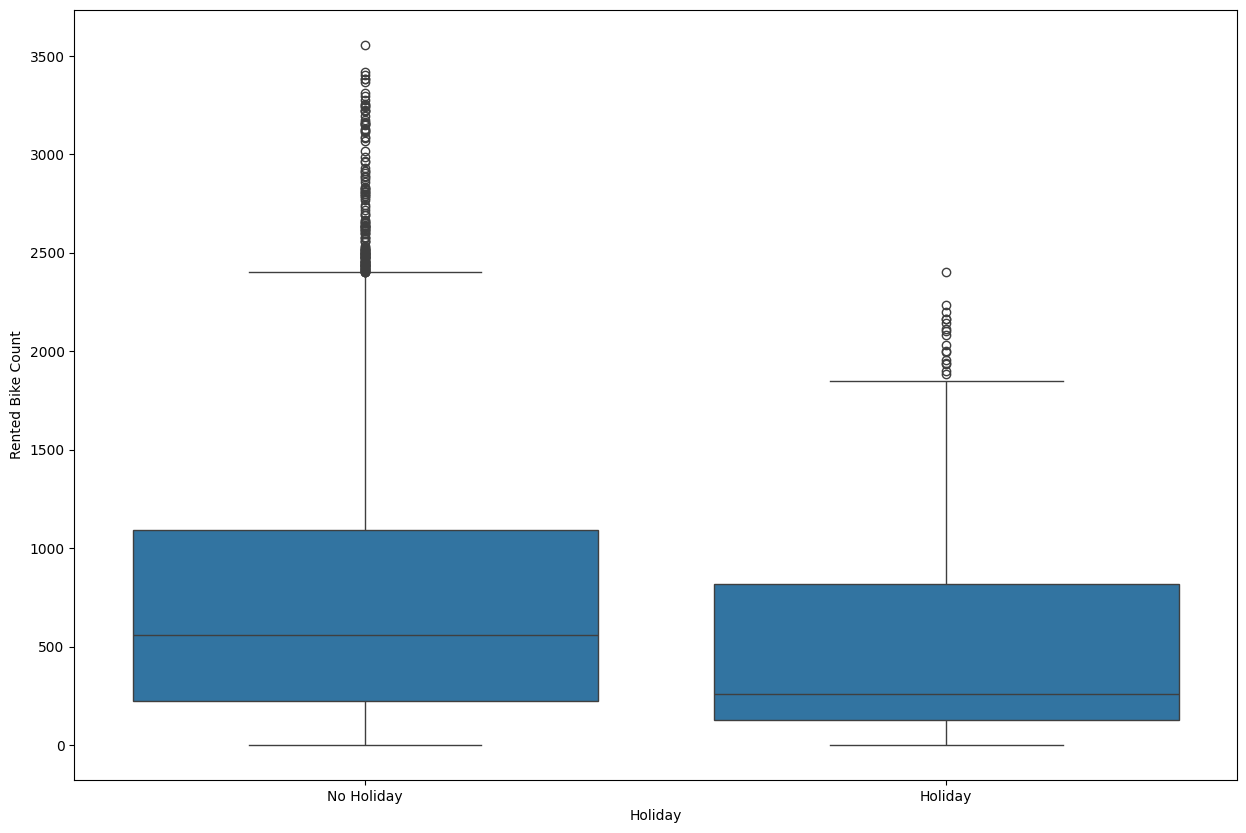

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Holiday",y='Rented Bike Count',data=data) 
plt.show()

##### -> On an aggregate rented bike count on No holidays is higher than holidays .

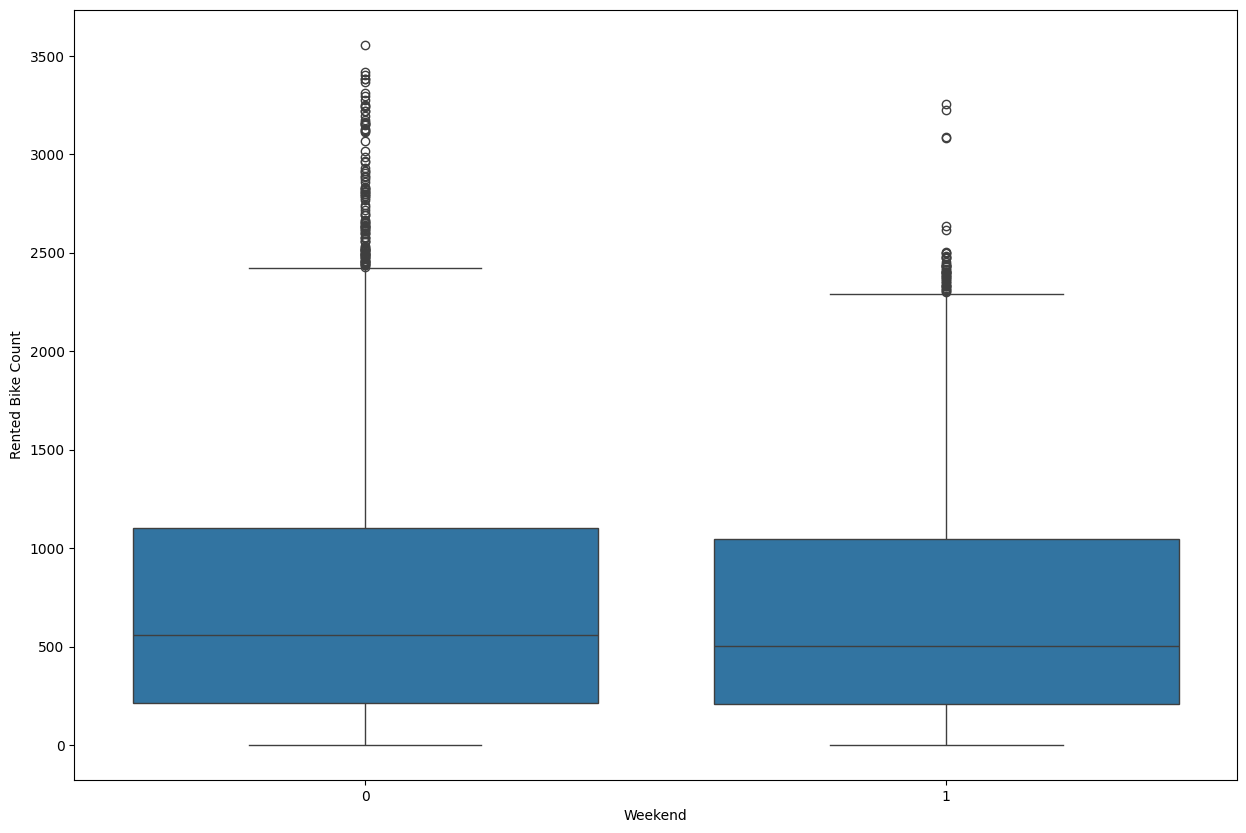

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Weekend",y='Rented Bike Count',data=data) # helps in finding outliers .
plt.show()

##### -> On an aggregate rented bike count is higher on weekdays than weekends .

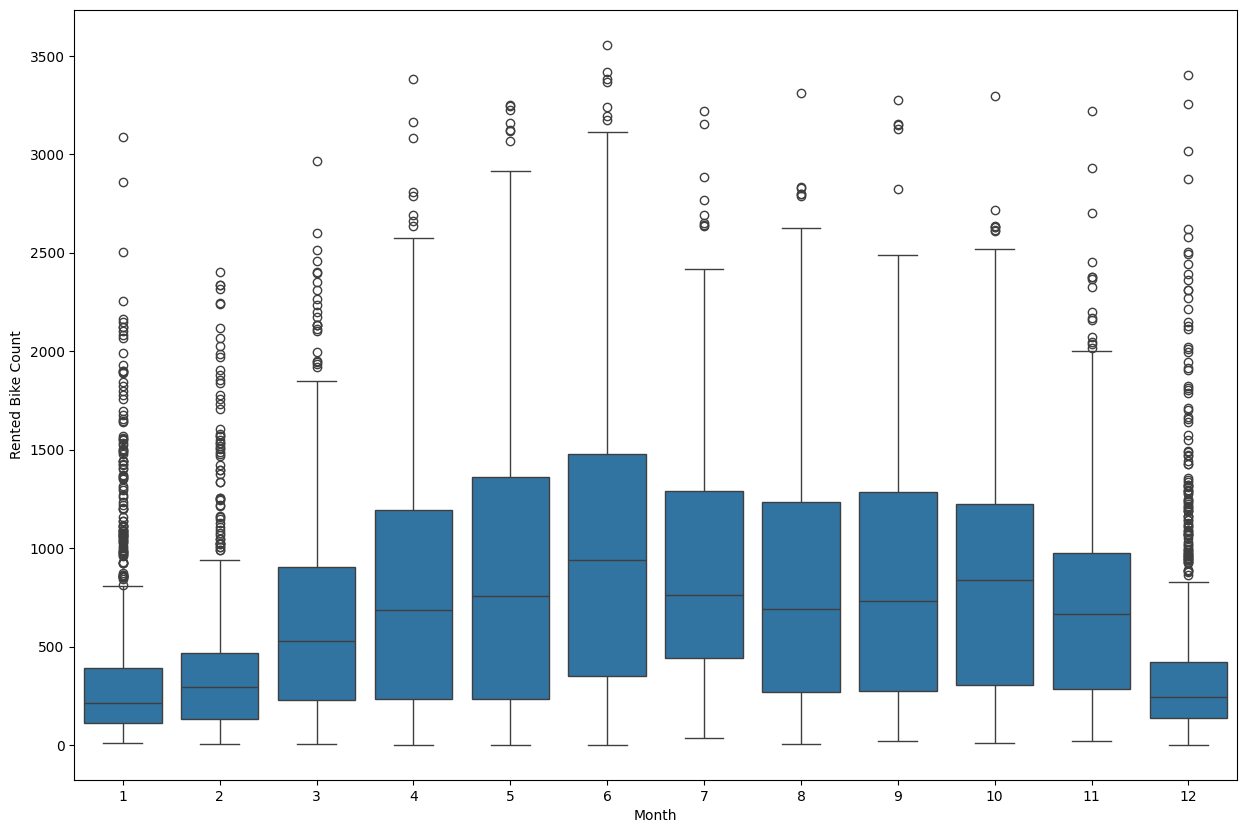

In [10]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Month",y='Rented Bike Count',data=data) # helps in finding outliers .
plt.show()

##### -> On an aggregate rented bike count on June is highest followed by May then July then August then April then September then March then October then November then February then December then January .The observation is in sync with the fact that rented bike count is highest in summer season .

<Figure size 1500x1000 with 0 Axes>

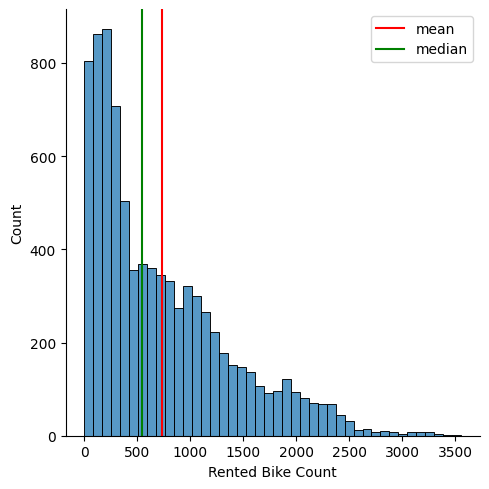

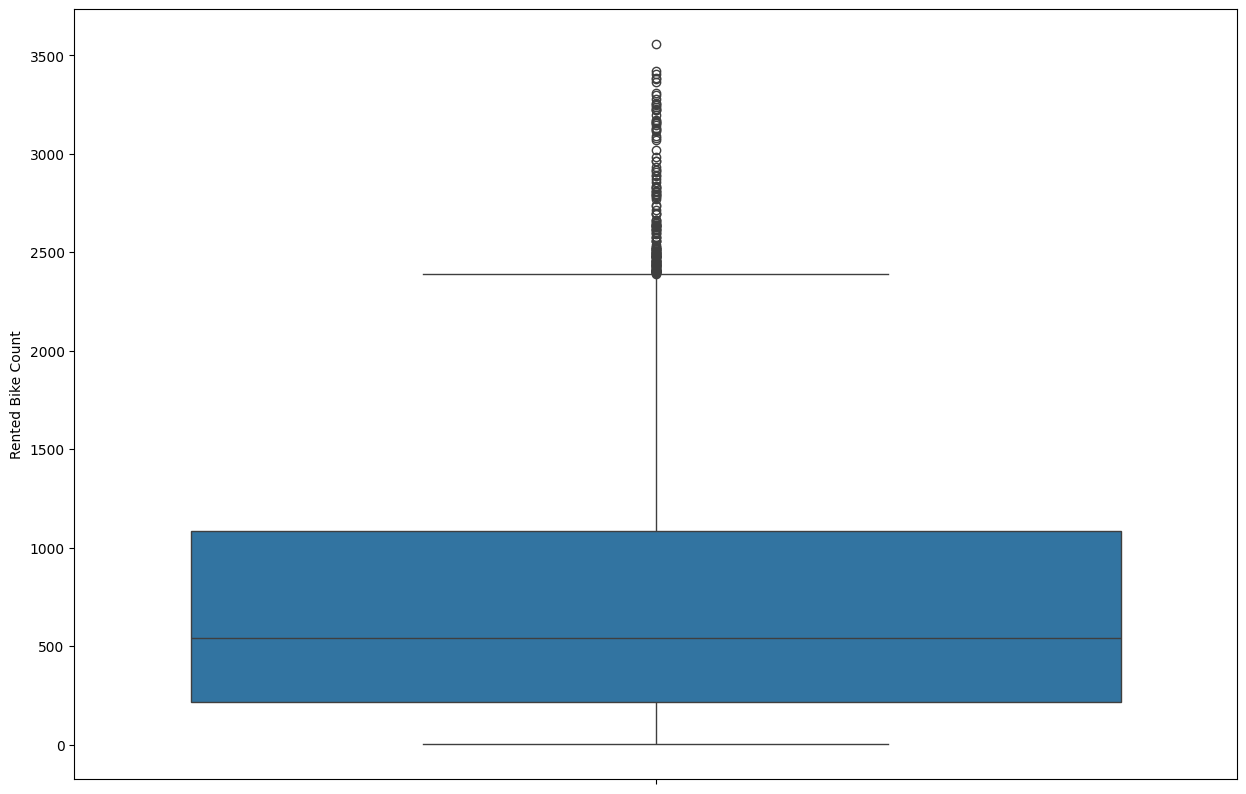

In [11]:
plt.figure(figsize=(15,10))
sns.displot(data["Rented Bike Count"])
plt.axvline(data["Rented Bike Count"].mean(),color='r',label='mean')
plt.axvline(data["Rented Bike Count"].median(),color='g',label='median')
plt.legend()
plt.show()

# Visulaize the outliers in the data
plt.figure(figsize=(15,10))
sns.boxplot(data["Rented Bike Count"])
plt.show()




##### -> Median is around 500 and mean is around 700 . The data is right skewed . Values above 2500 rented bike count are less frequent.

<Figure size 1500x1000 with 0 Axes>

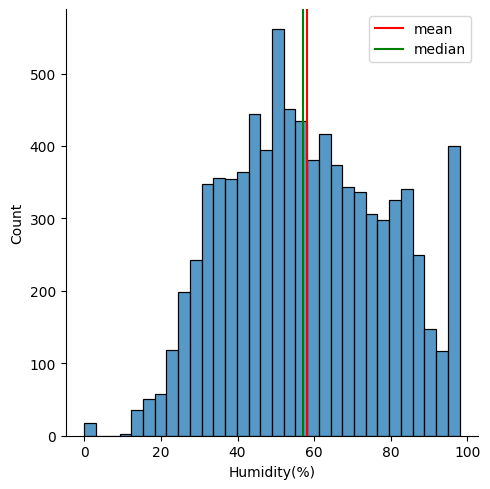

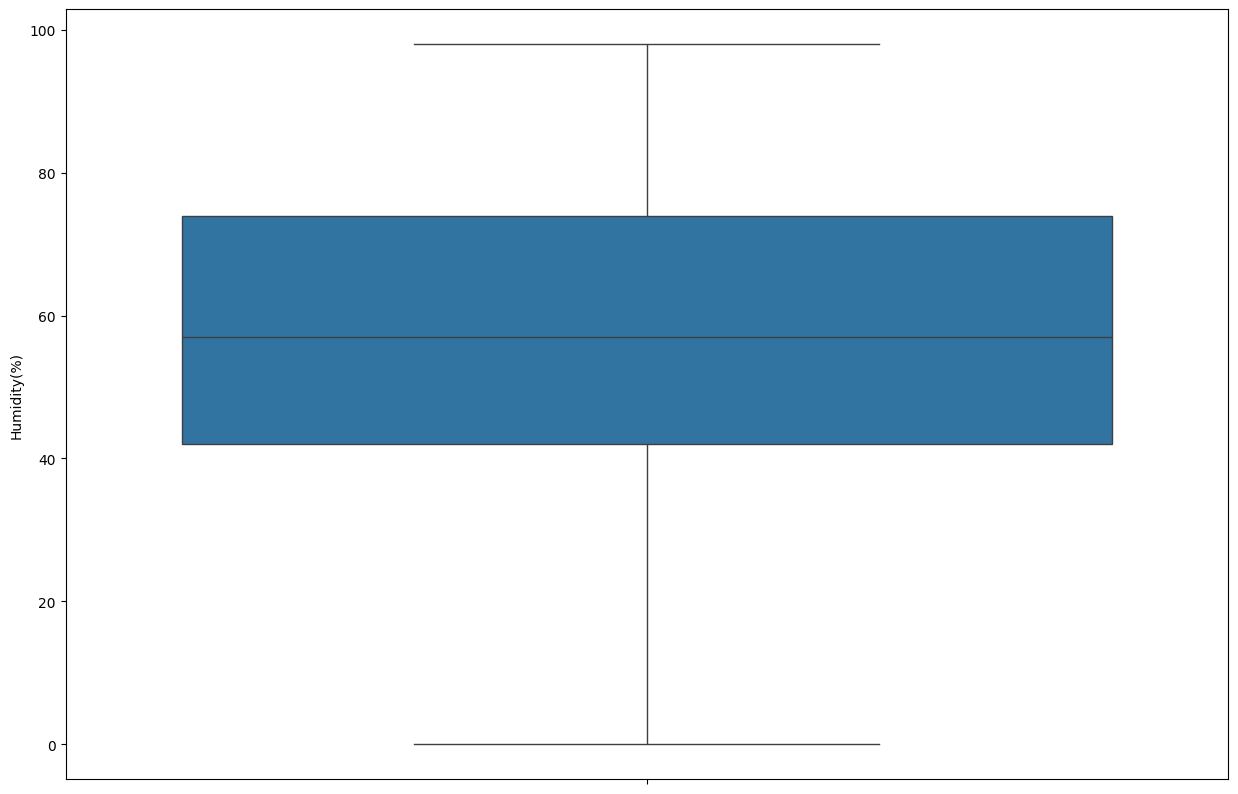

In [12]:
plt.figure(figsize=(15,10))
sns.displot(data["Humidity(%)"])# it is deprecated see more into it .
plt.axvline(data["Humidity(%)"].mean(),color='r',label='mean')
plt.axvline(data["Humidity(%)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Humidity(%)"])
plt.show()


##### -> Mean is around 58 and median around 55 . The distribution is litle bit skewed to the left but not much . There are no outliers on aggregate .

<Figure size 1500x1000 with 0 Axes>

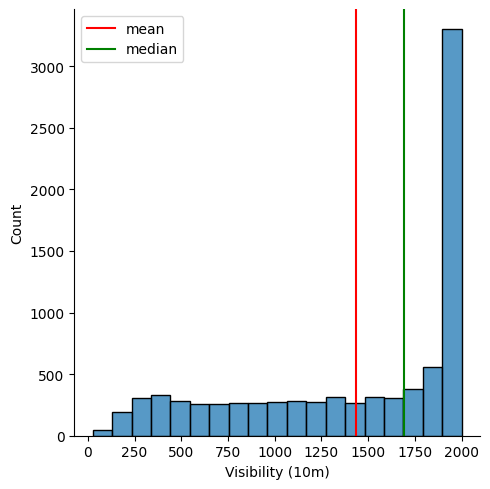

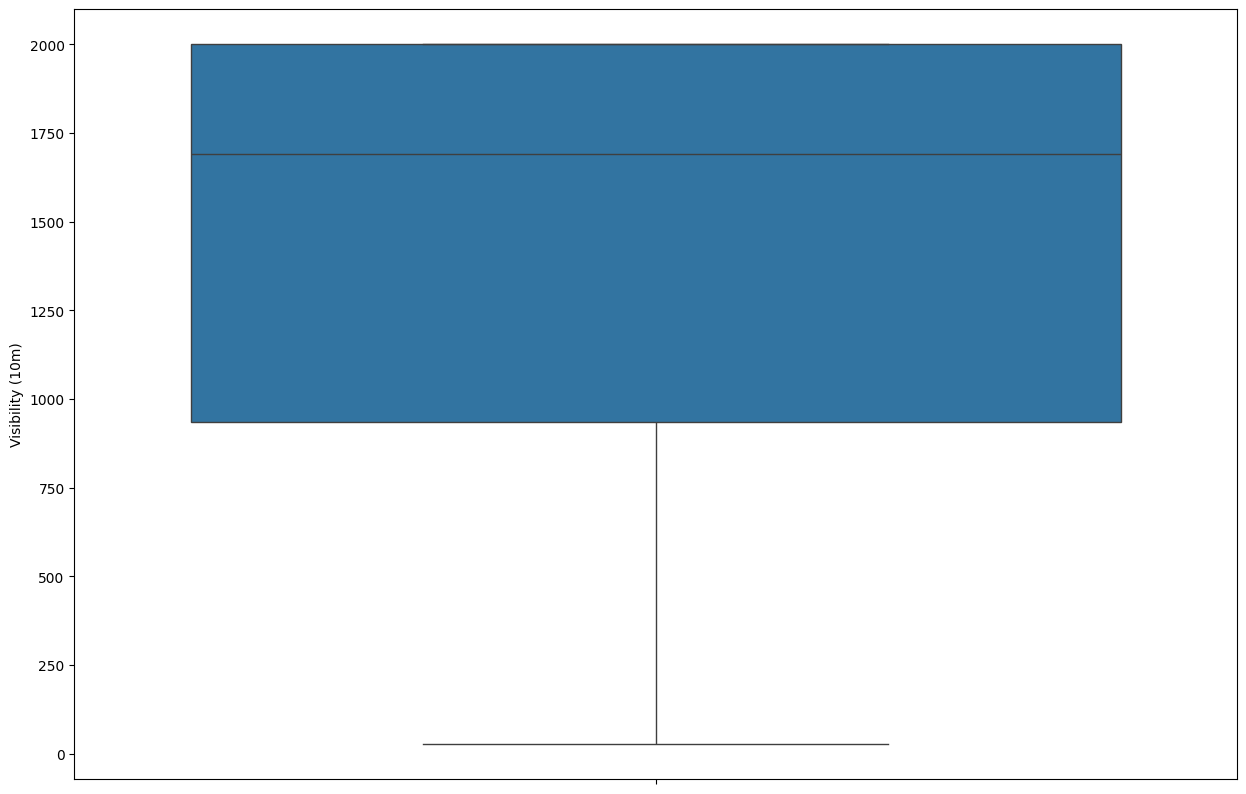

In [13]:
plt.figure(figsize=(15,10))
sns.displot(data["Visibility (10m)"])# it is deprecated see more into it .
plt.axvline(data["Visibility (10m)"].mean(),color='r',label='mean')
plt.axvline(data["Visibility (10m)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Visibility (10m)"])
plt.show()



##### -> Mean is around 1400 and median around 1650 . Distribution is very left skewed . There are no outliers on aggregate .

<Figure size 1500x1000 with 0 Axes>

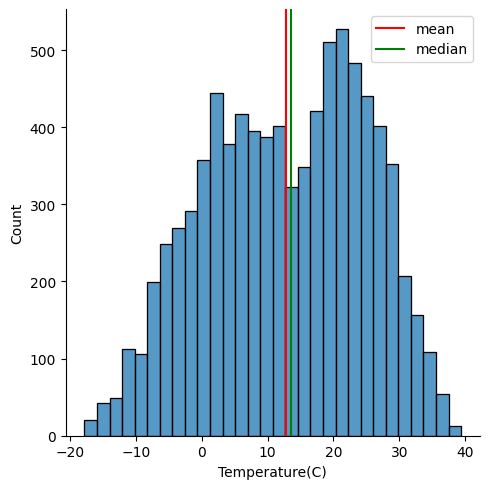

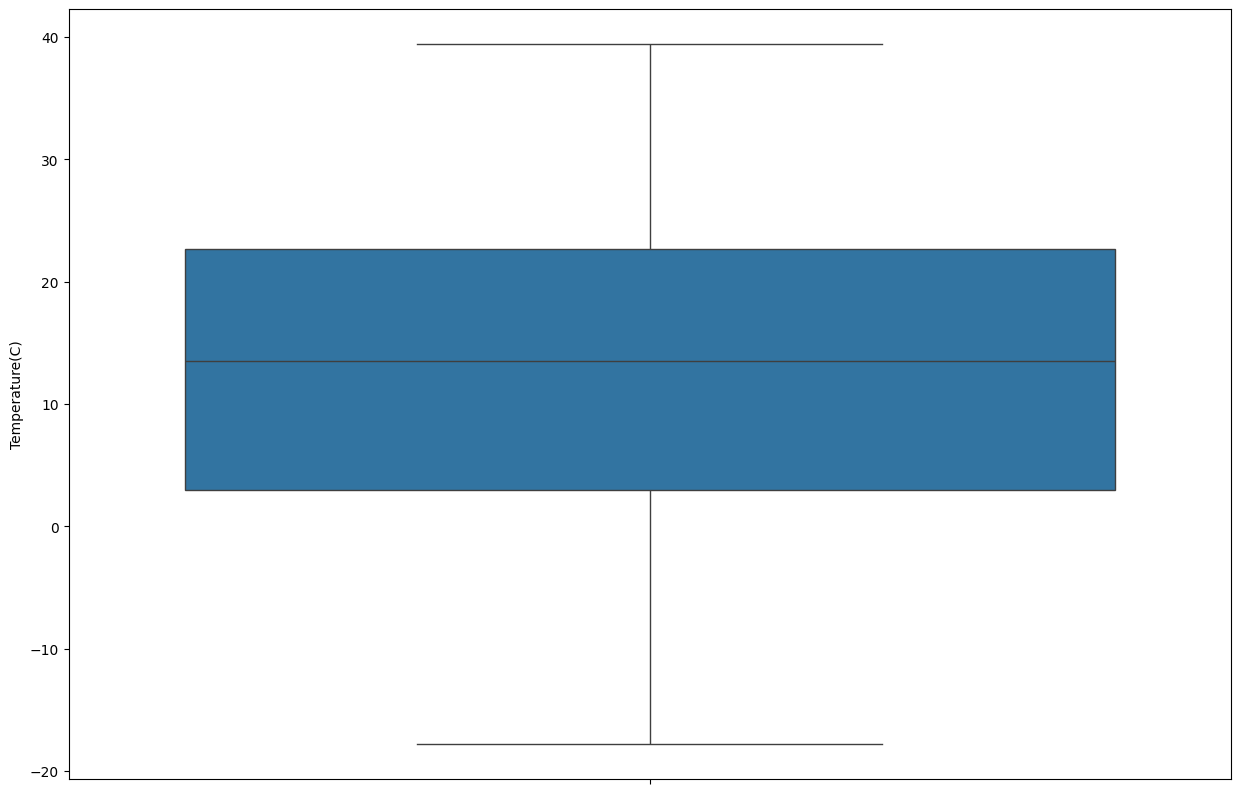

In [14]:
plt.figure(figsize=(15,10))
sns.displot(data["Temperature(C)"])# it is deprecated see more into it .
plt.axvline(data["Temperature(C)"].mean(),color='r',label='mean')
plt.axvline(data["Temperature(C)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Temperature(C)"])
plt.show()

##### -> Mean is nearly 12 and median is around 13 . There are no outliers .

<Figure size 1500x1000 with 0 Axes>

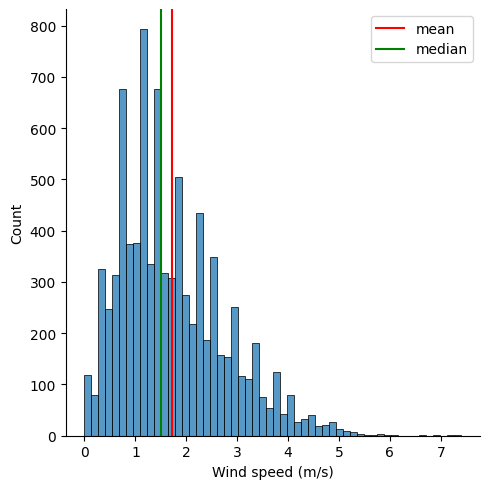

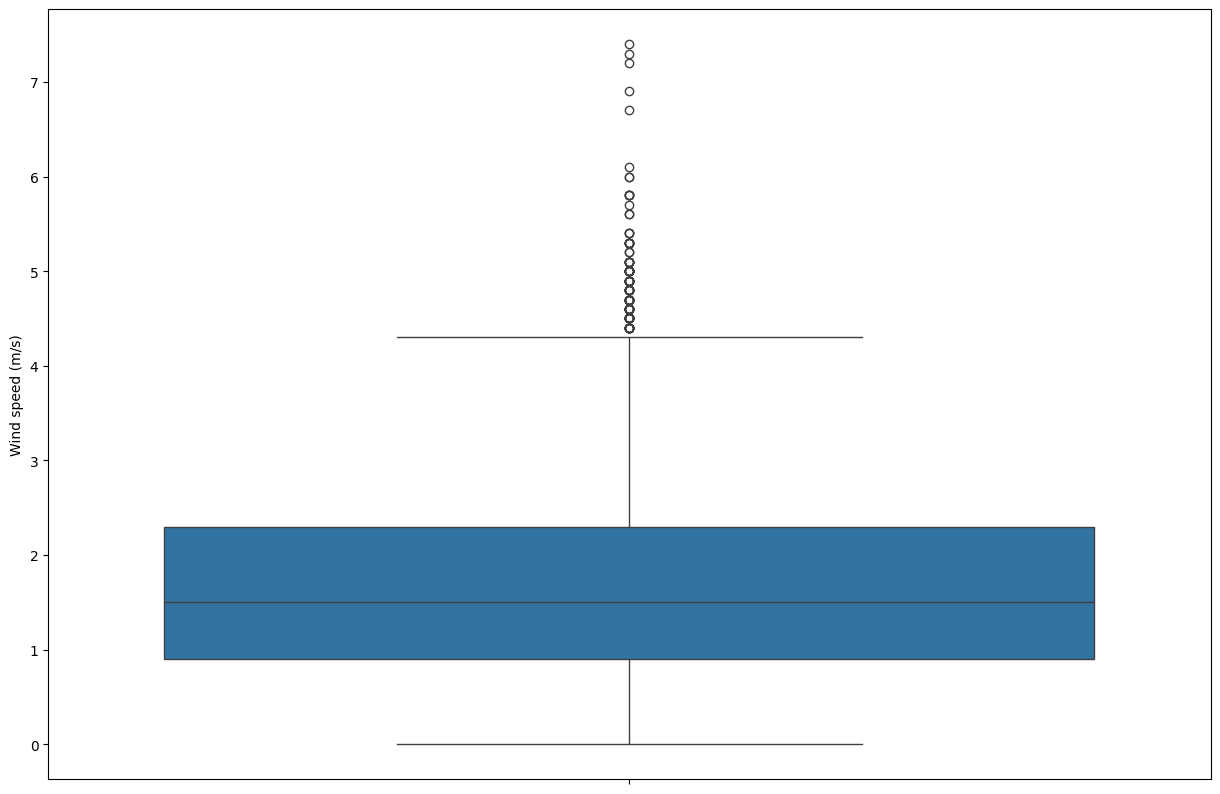

In [15]:
plt.figure(figsize=(15,10))
sns.displot(data["Wind speed (m/s)"])# it is deprecated see more into it .
plt.axvline(data["Wind speed (m/s)"].mean(),color='r',label='mean')
plt.axvline(data["Wind speed (m/s)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Wind speed (m/s)"])
plt.show()


##### -> Median is around 1.4 and mean is around 1.7 . The distribution is right skewed . Wind speed above 4.2 is less frequent .

<Figure size 1500x1000 with 0 Axes>

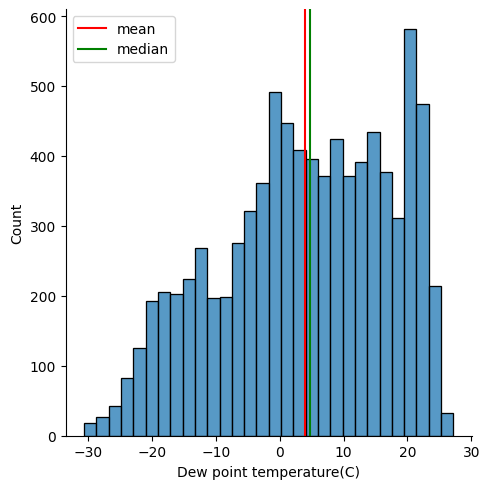

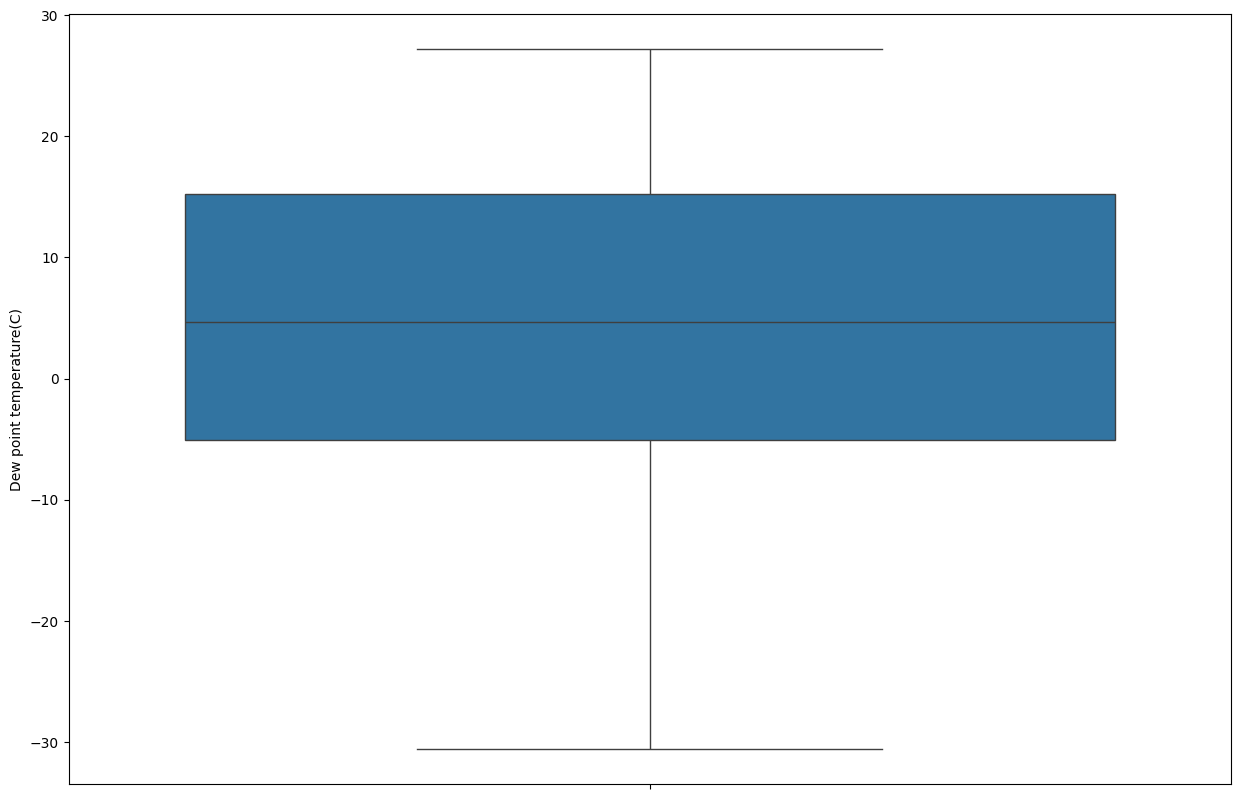

In [16]:
plt.figure(figsize=(15,10))
sns.displot(data["Dew point temperature(C)"])# it is deprecated see more into it .
plt.axvline(data["Dew point temperature(C)"].mean(),color='r',label='mean')
plt.axvline(data["Dew point temperature(C)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Dew point temperature(C)"])
plt.show()


##### -> mean is around 4 and median around 4.2 .Distribution is left skewed a little bit . There are no outliers .

<Figure size 1500x1000 with 0 Axes>

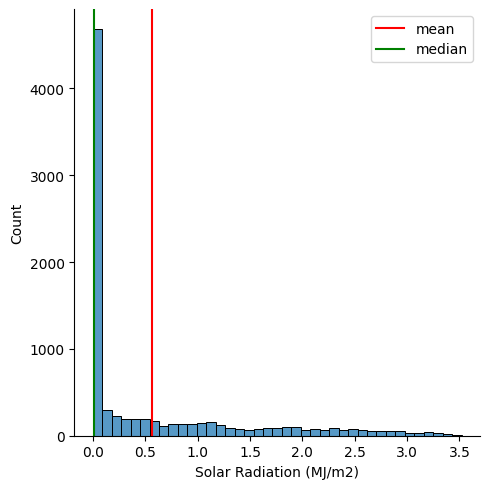

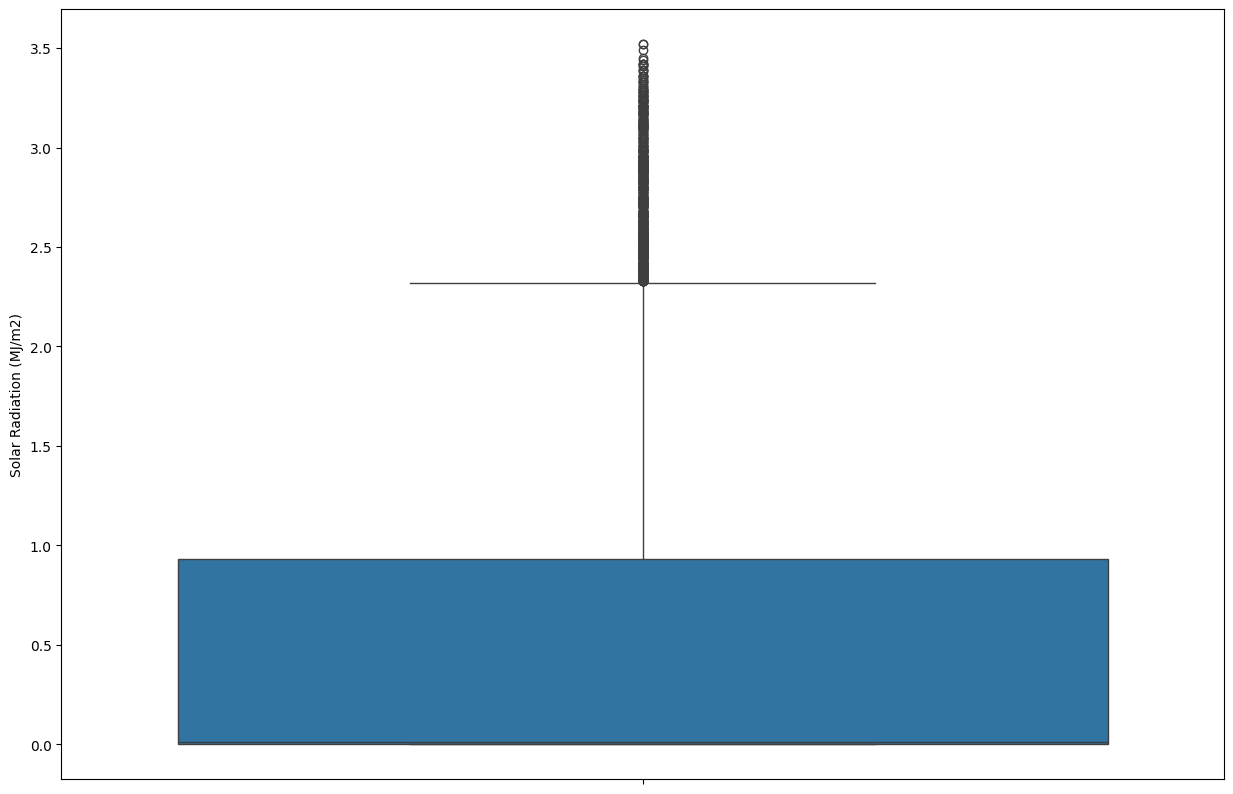

In [17]:
plt.figure(figsize=(15,10))
sns.displot(data[ "Solar Radiation (MJ/m2)"])# it is deprecated see more into it .
plt.axvline(data["Solar Radiation (MJ/m2)"].mean(),color='r',label='mean')
plt.axvline(data["Solar Radiation (MJ/m2)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Solar Radiation (MJ/m2)"])
plt.show()


##### -> Mean is roughly 0.5 and median is around 0 . The distribution is right skewed . Solar Radiation above 2.25 is less frequent .

<Figure size 1500x1000 with 0 Axes>

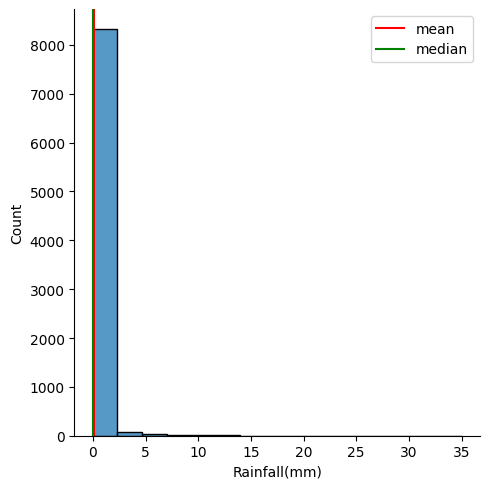

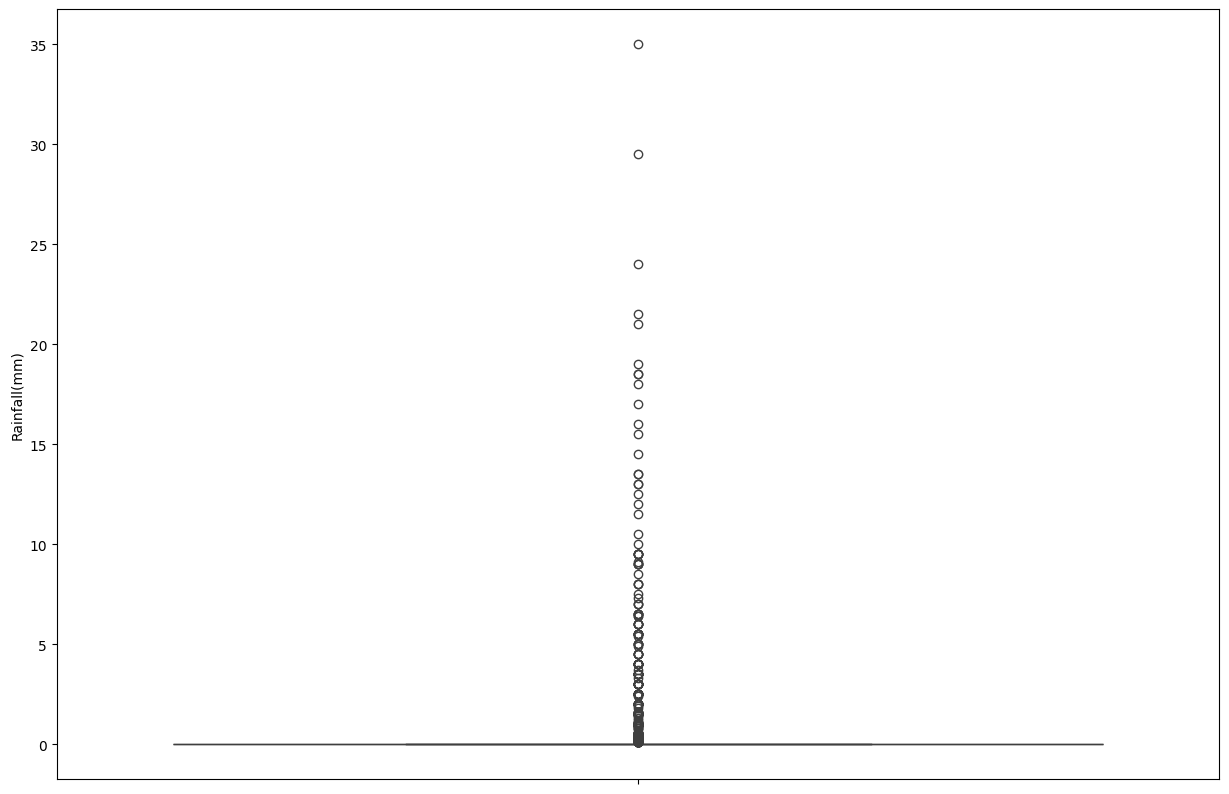

In [18]:
plt.figure(figsize=(15,10))
sns.displot(data["Rainfall(mm)"])# it is deprecated see more into it .
plt.axvline(data["Rainfall(mm)"].mean(),color='r',label='mean')
plt.axvline(data["Rainfall(mm)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Rainfall(mm)"])
plt.show()


##### -> Mean is around 0.1 and median is 0 . The distribution is right skewed . Rainfall above 2 is very less frequent .

<Figure size 1500x1000 with 0 Axes>

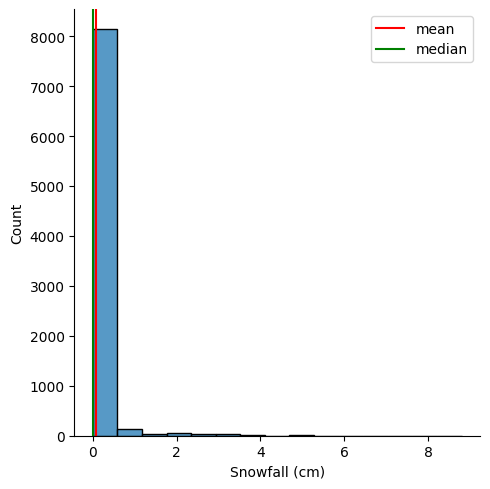

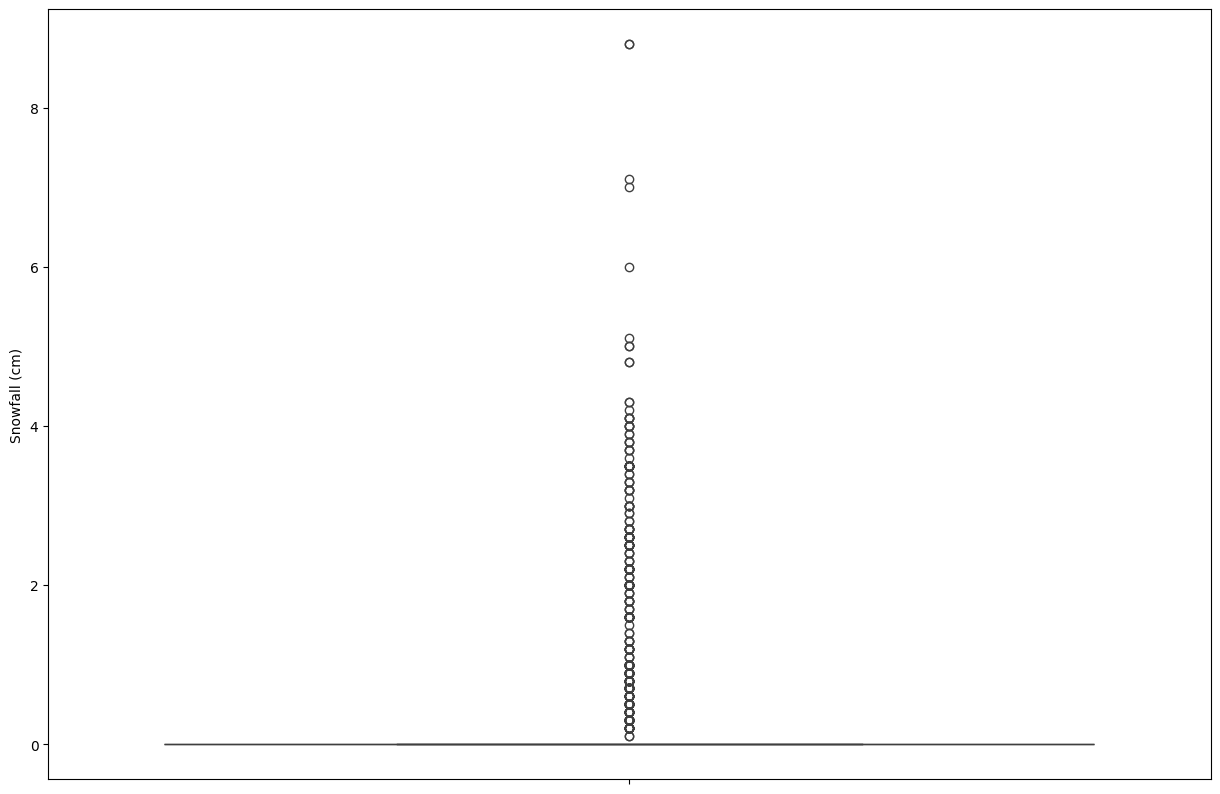

In [19]:
plt.figure(figsize=(15,10))
sns.displot(data["Snowfall (cm)"])# it is deprecated see more into it .
plt.axvline(data["Snowfall (cm)"].mean(),color='r',label='mean')
plt.axvline(data["Snowfall (cm)"].median(),color='g',label='median')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(data["Snowfall (cm)"])
plt.show()


##### -> Mean is around 0.1 and median is 0 . The distribution is right skewed . Rainfall above 0.5 is very less frequent .

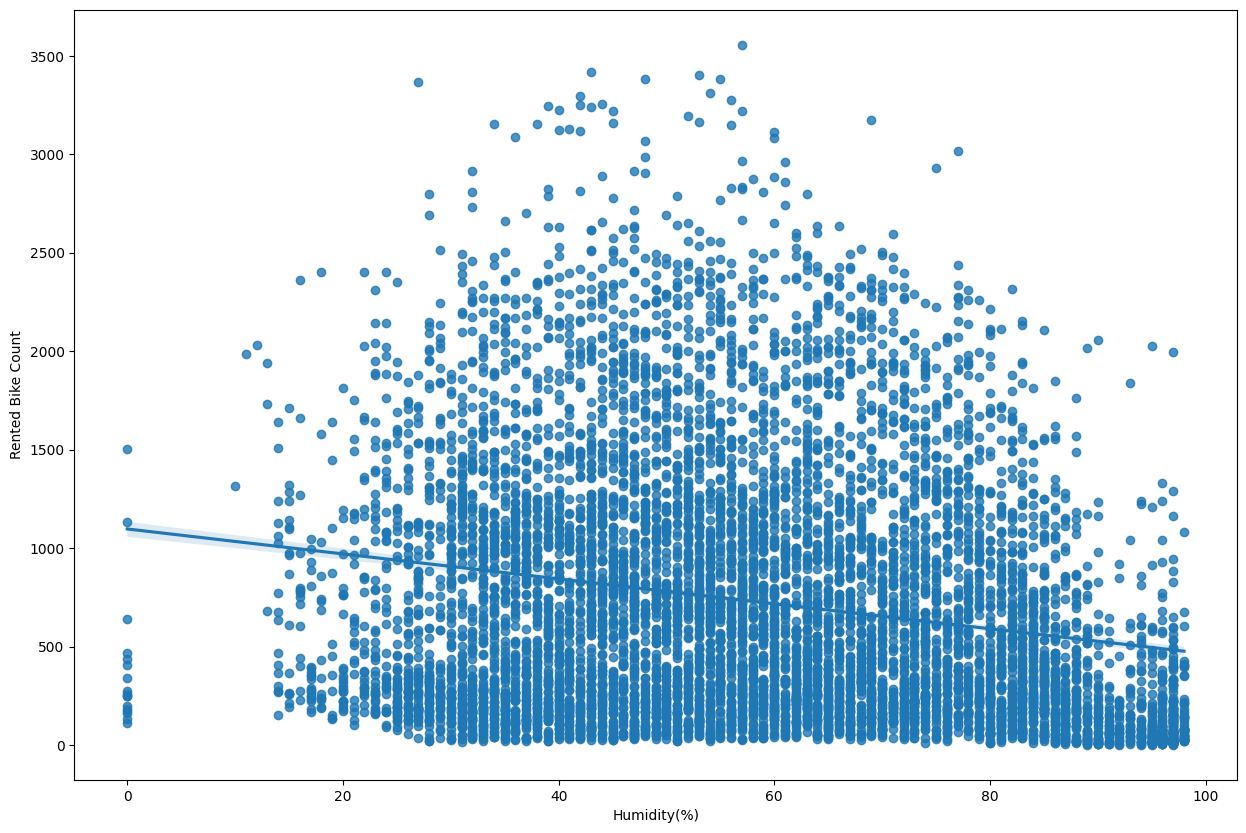

In [20]:
plt.figure(figsize=(15,10))
sns.regplot(x="Humidity(%)",y='Rented Bike Count',data=data)
plt.show()

##### -> Rented Bike Count reduces as Humidity increases on aggregate .

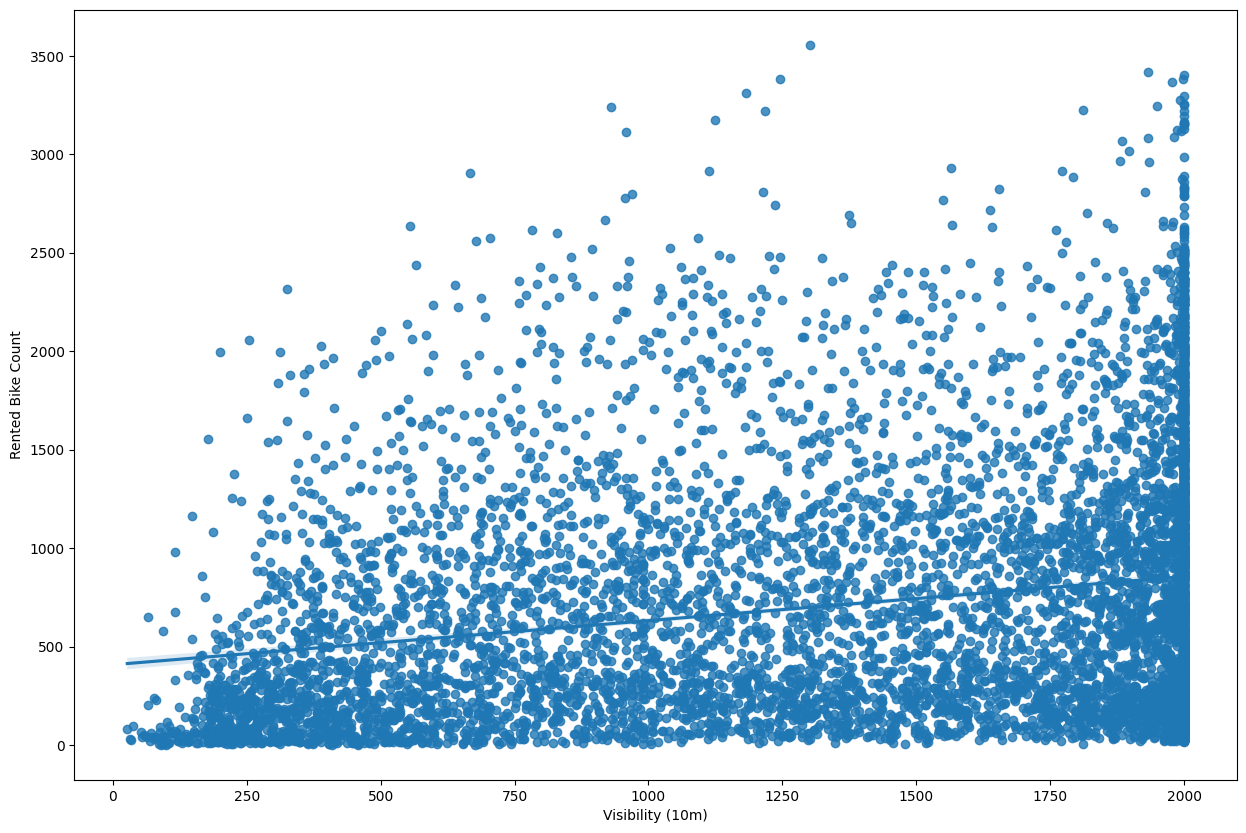

In [21]:
plt.figure(figsize=(15,10))
sns.regplot(x="Visibility (10m)",y='Rented Bike Count',data=data)
plt.show()

##### -> Rented Bike Count increases as visibility increases on aggregate .

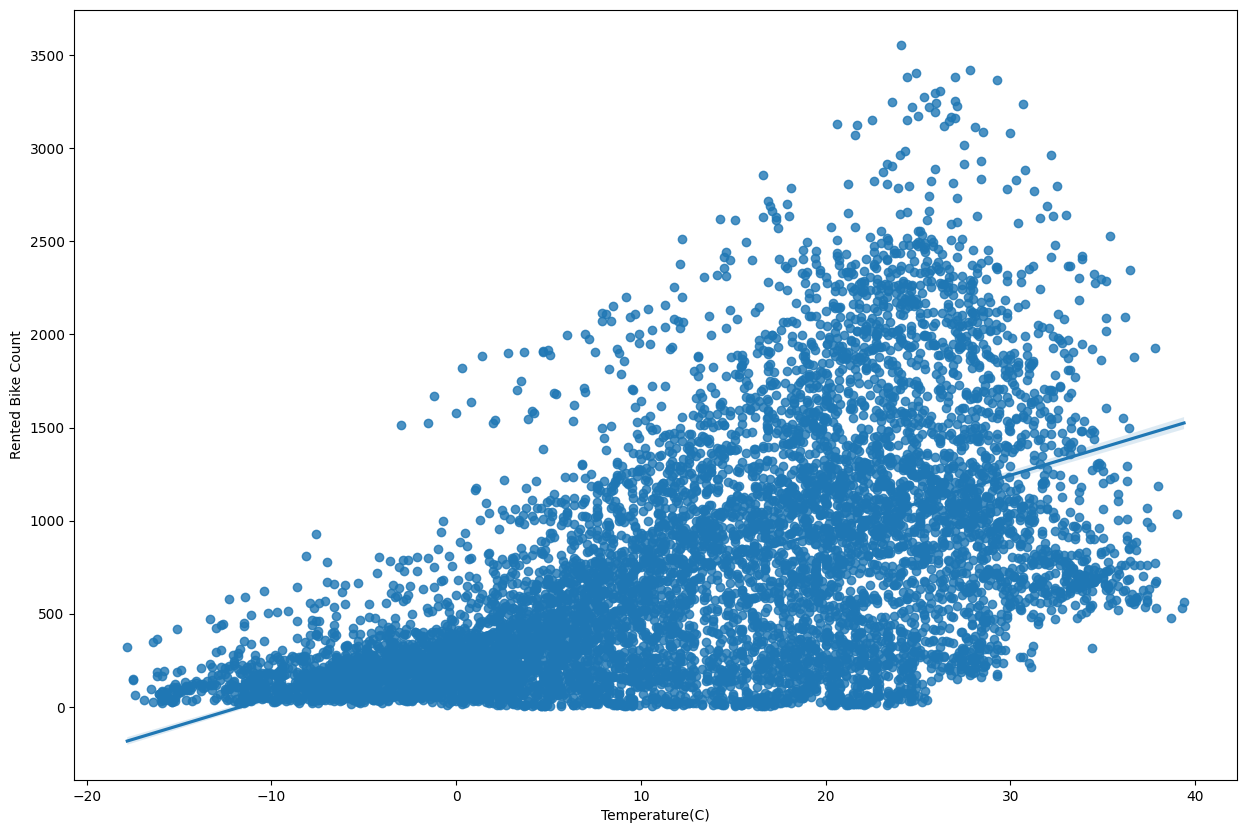

In [22]:
plt.figure(figsize=(15,10))
sns.regplot(x="Temperature(C)",y='Rented Bike Count',data=data)
plt.show()


##### -> Rented Bike Count increases as tempreature increases on aggregate .

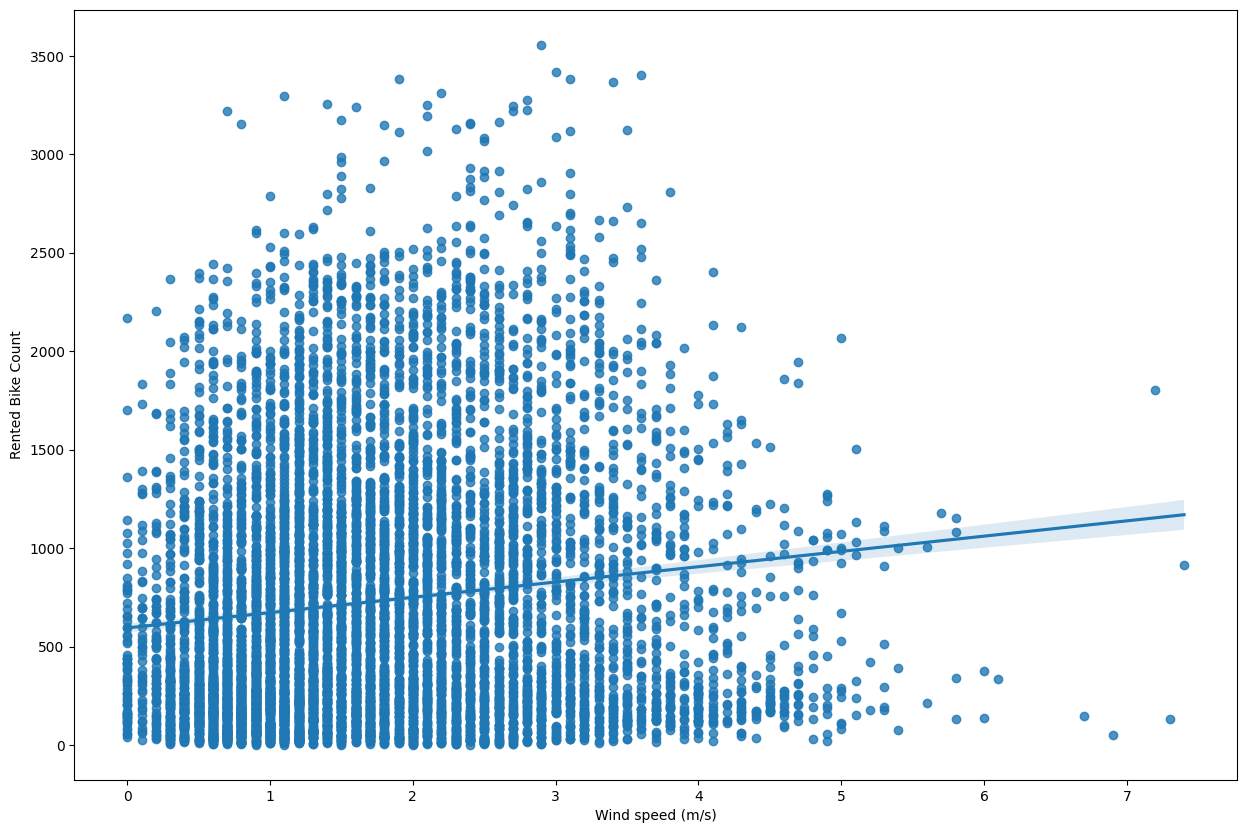

In [23]:
plt.figure(figsize=(15,10))
sns.regplot(x="Wind speed (m/s)",y='Rented Bike Count',data=data)
plt.show()


##### -> Rented Bike Count increases as Wind Speed increases on aggregate .

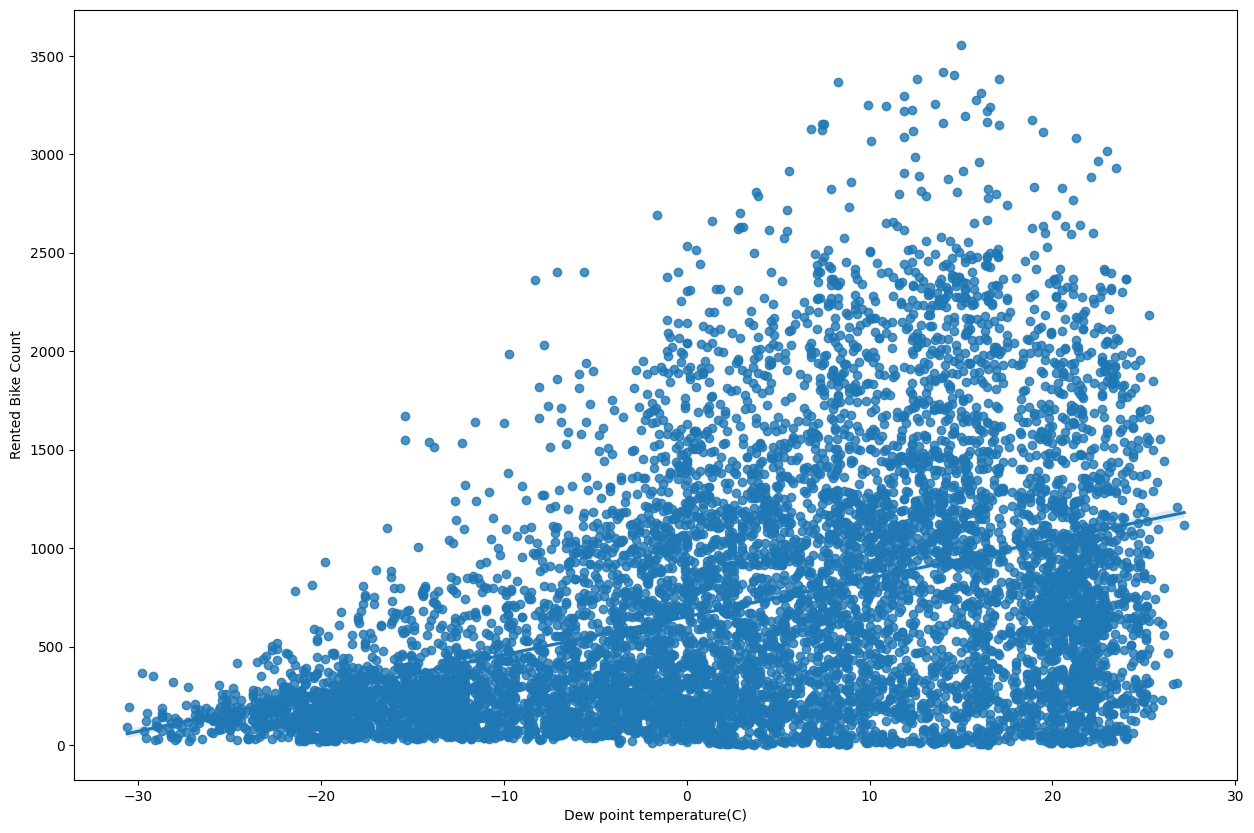

In [24]:
plt.figure(figsize=(15,10))
sns.regplot(x="Dew point temperature(C)",y='Rented Bike Count',data=data)
plt.show()


##### -> Rented Bike Count increases as Dew Point Temperature increases on aggregate .

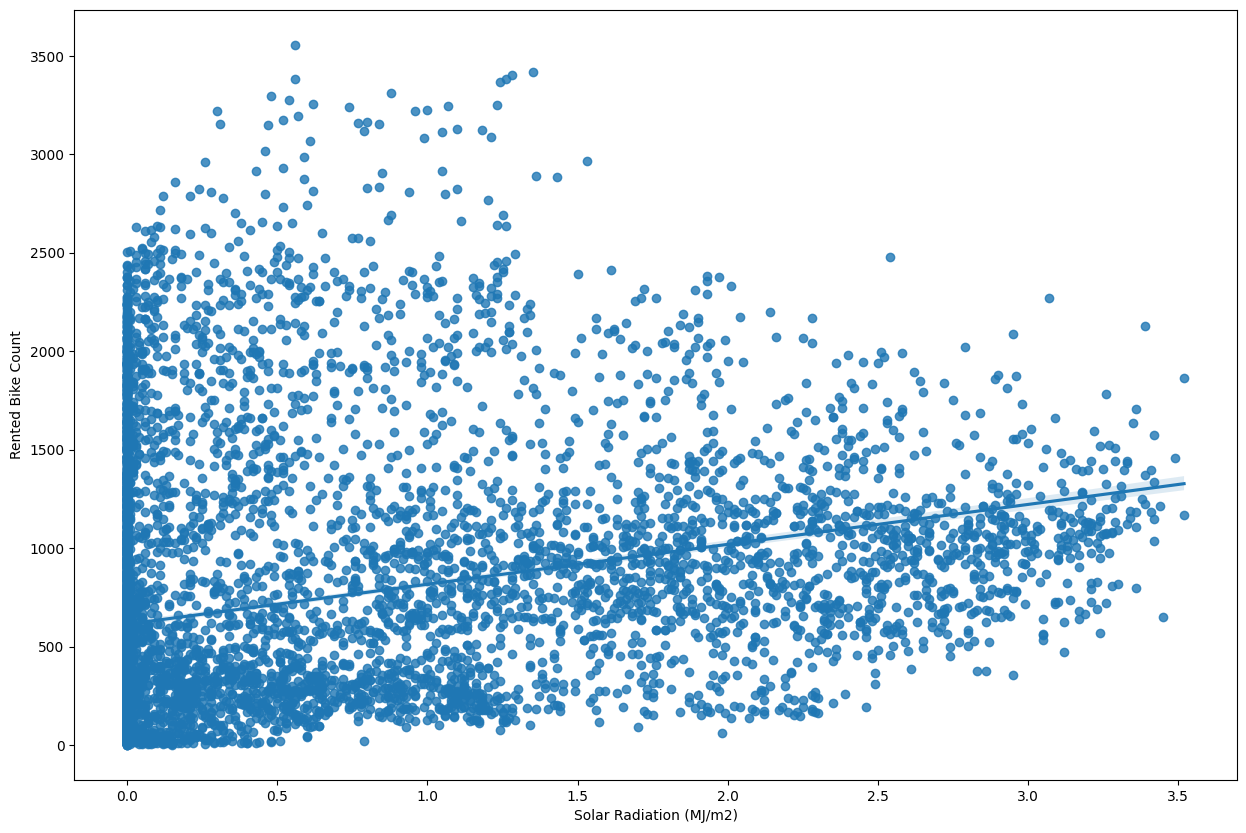

In [25]:
plt.figure(figsize=(15,10))
sns.regplot(x="Solar Radiation (MJ/m2)",y='Rented Bike Count',data=data)
plt.show()


##### -> Rented Bike Count increases as Solar Radiation increases on aggregate .

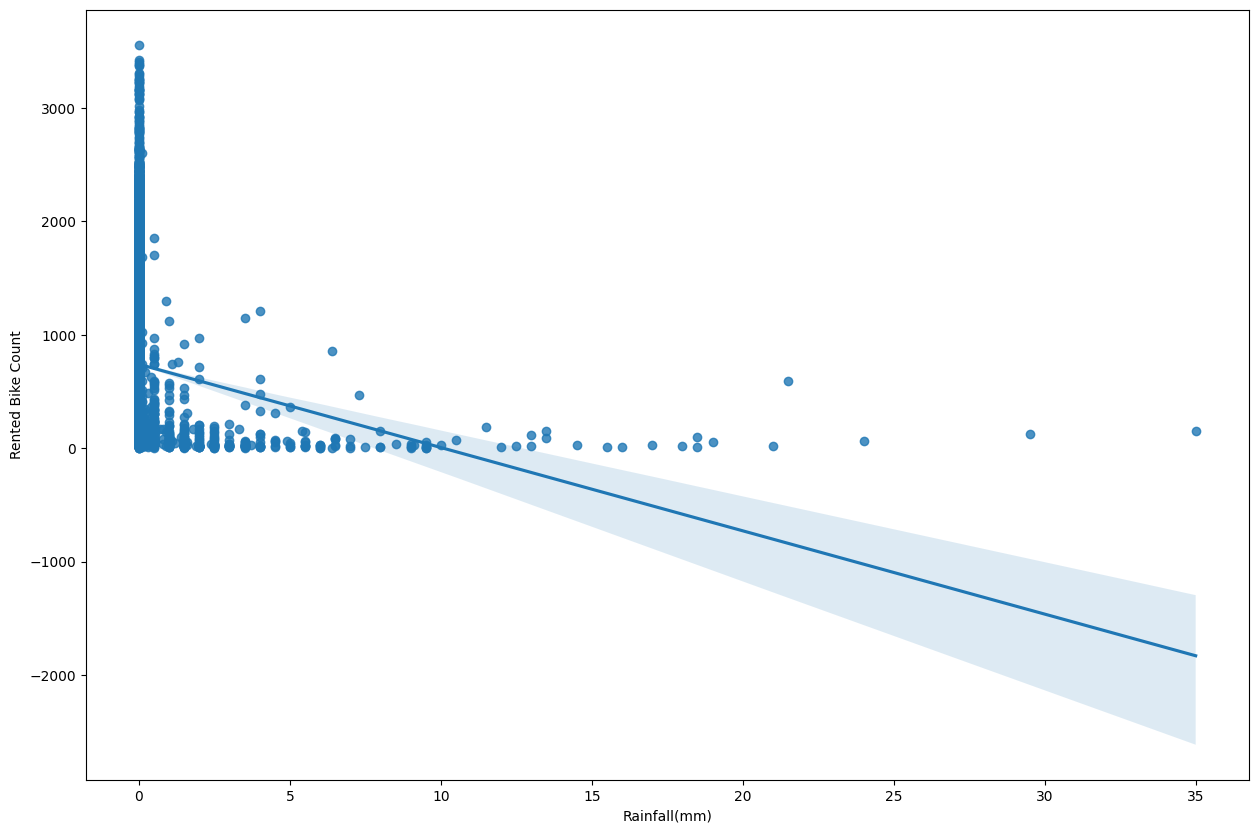

In [26]:
plt.figure(figsize=(15,10))
sns.regplot(x="Rainfall(mm)",y='Rented Bike Count',data=data)
plt.show()


##### -> Rented Bike Count reduces as Rainfall increases on aggregate .

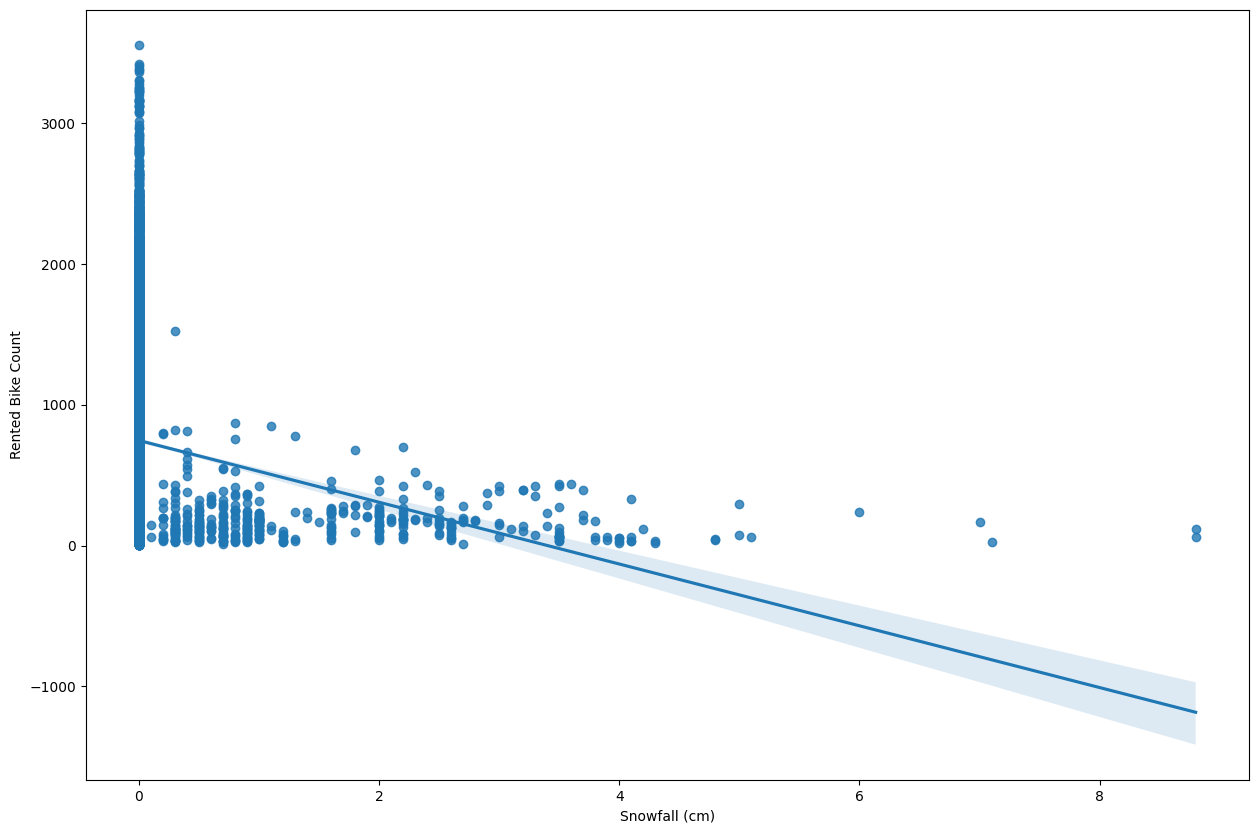

In [27]:
plt.figure(figsize=(15,10))
sns.regplot(x="Snowfall (cm)",y='Rented Bike Count',data=data)
plt.show()


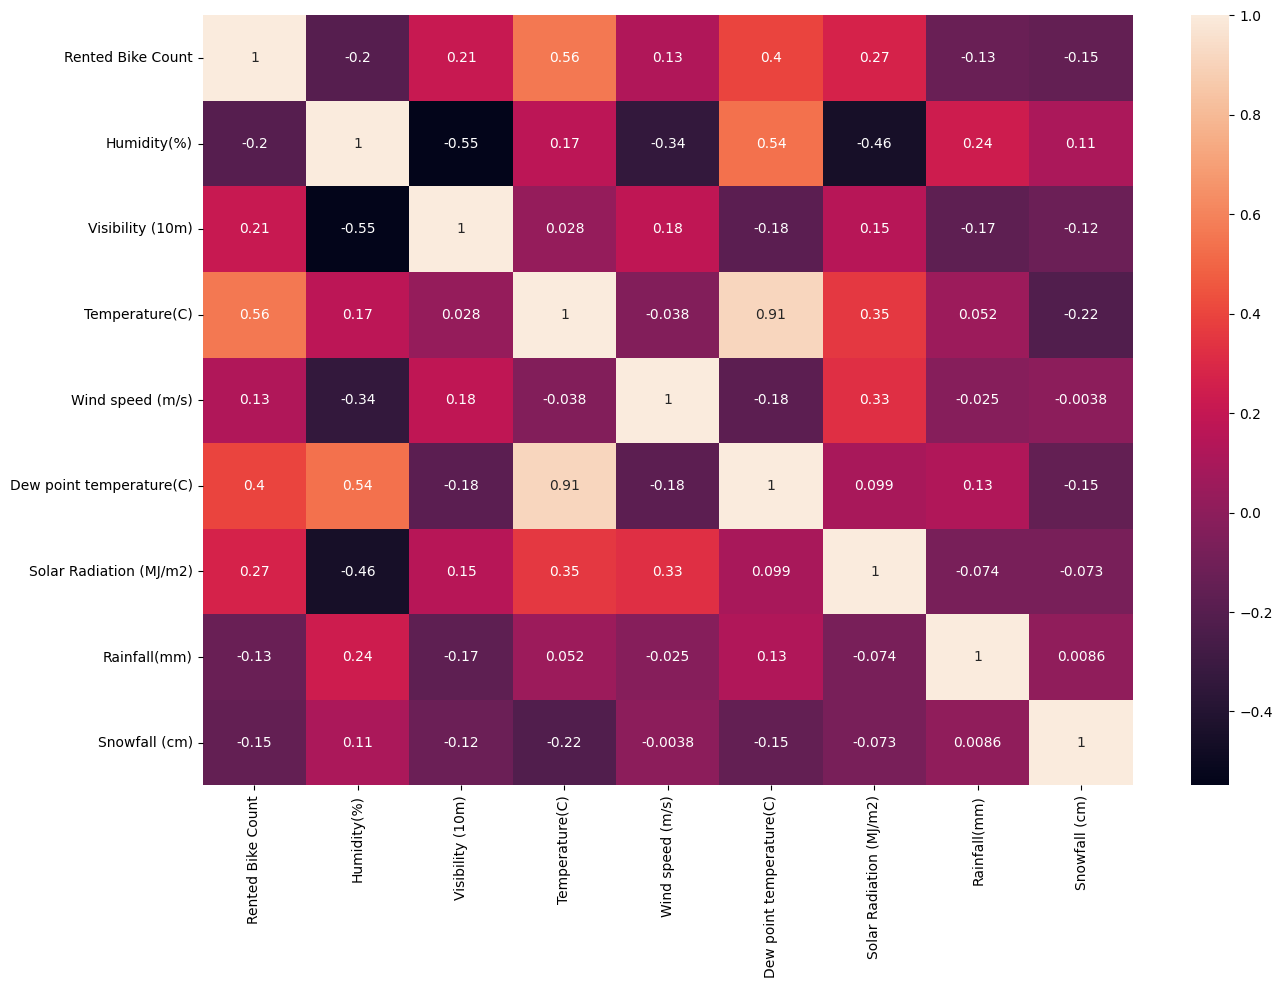

In [28]:
correlation = data[numerical_features].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True) 
plt.show()



##### Remove Dew Point Temperature as it is highly correlated with Temperature .(corr_coeff > 0.7)

In [29]:
# remove Dew point temperature(C) as it is highly correlated with Temperature(C)
data = data.drop('Dew point temperature(C)', axis = 1)

In [30]:
# one hot encoding for seasons
data['Seasons'].unique()
data['Seasons'] = data['Seasons'].map({'Winter':0,'Spring':1,'Summer':2,'Autumn':3})


In [31]:
data['Holiday'].unique()
data['Holiday'] = data['Holiday'].map({'No Holiday':0,'Holiday':1})

<Figure size 1500x1000 with 0 Axes>

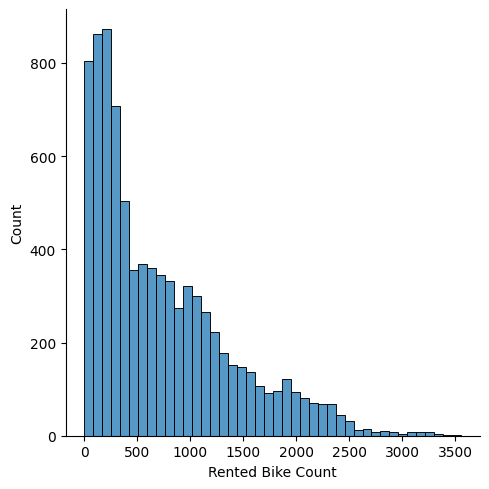

1.1397000550865888


In [32]:
plt.figure(figsize=(15,10))
sns.displot(data['Rented Bike Count'])
plt.show()
print(data['Rented Bike Count'].skew())
### The target variable is skewed , hence we apply square root to normalize it . There are other methods to normalize the data as well .

0.34670341483191813


<Figure size 1500x1000 with 0 Axes>

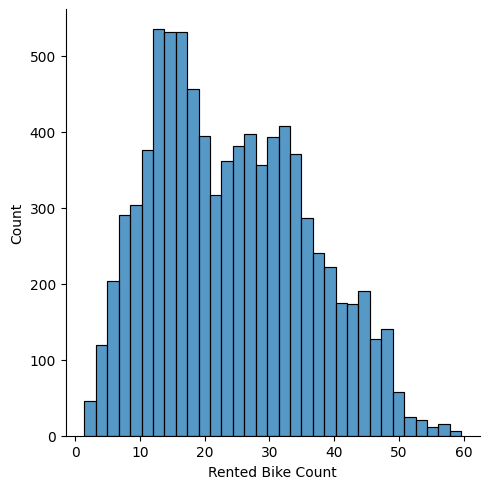

In [33]:

# the data is right skewed , hence apply sqrt transformation to normalize the data.
column = np.sqrt(data['Rented Bike Count'])
# less skewnsess than original .

print(column.skew())
plt.figure(figsize=(15,10))
sns.displot(column)
plt.show()

data['Rented Bike Count'] = column


## c. Build, train, test and optimize the model
1. Seperate target and features from the data.
2. Do 80:20 train test split.
3. Train the XGBoost regression model with default parameters.
4. Tune the hyperparameters of the model using Optuna. Save the best hyperparameters.

   


In [34]:
# Seperate target and features from the data.
data_features = data.drop('Rented Bike Count',axis=1)
target = data['Rented Bike Count']


In [35]:
# Do 80:20 train test split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_features,target,test_size=0.2,random_state=42)


In [36]:

# Train the XGBoost regression model with default parameters.

from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

model = XGBRegressor()
model.fit(X_train,y_train)

# Report  r2  and RMSE values for train and test datasets.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Train r2 score: 0.9820528067813779
Test r2 score: 0.9074790450837308
Train RMSE: 1.5966782225687222
Test RMSE: 3.530931832013114


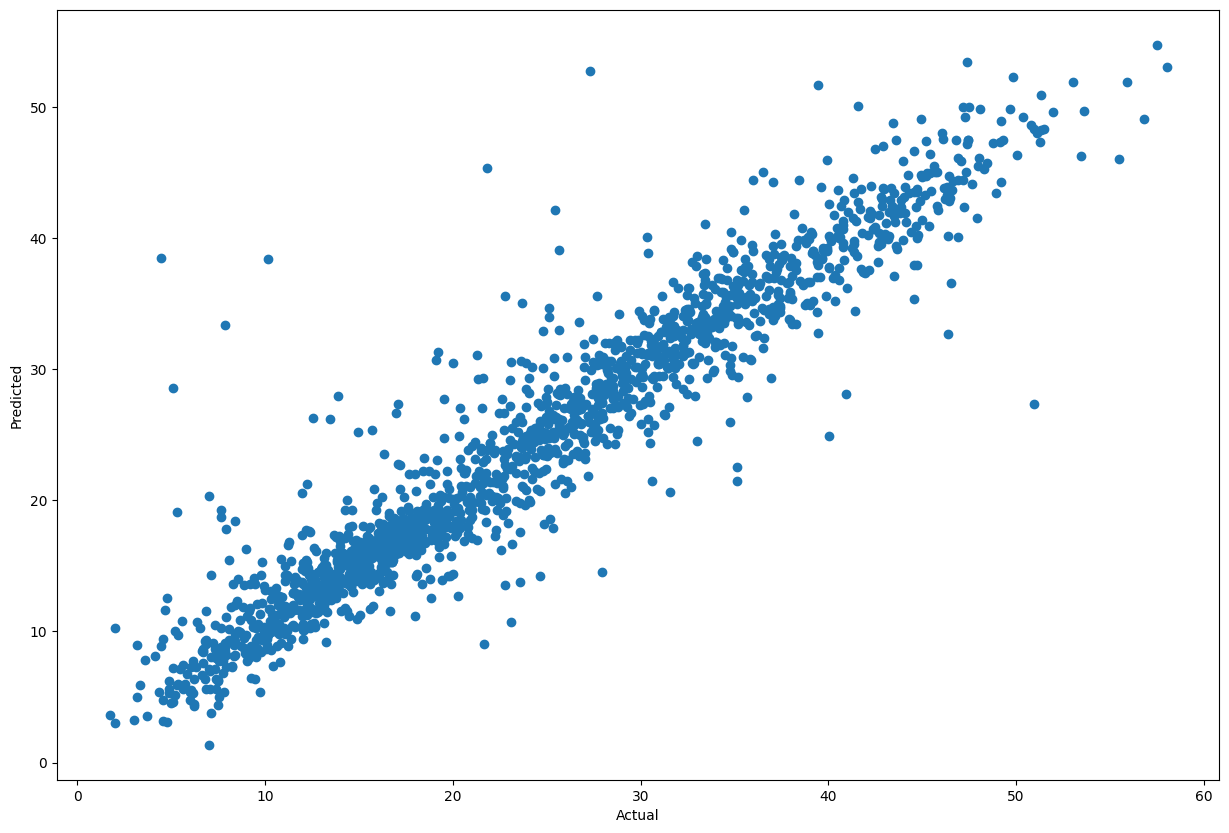

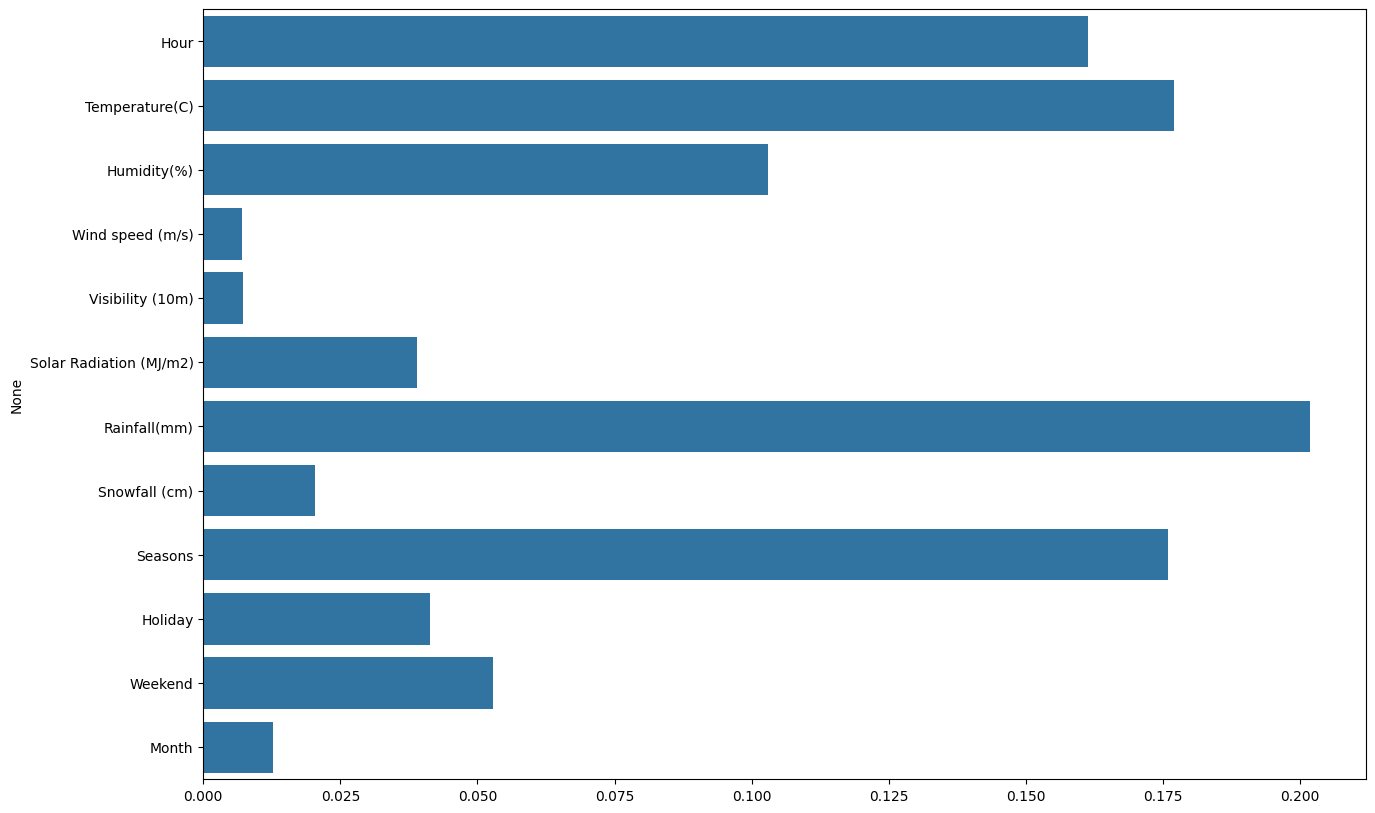

In [37]:

print('Train r2 score:',r2_score(y_train,y_train_pred))
print('Test r2 score:',r2_score(y_test,y_test_pred))

print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

# Plot actual vs predicted for the test data.
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


plt.figure(figsize=(15,10))
sns.barplot(x=model.feature_importances_,y=data_features.columns)
plt.show()


In [ ]:
x_dict = model.get_booster().get_score(importance_type='gain')
sorted_dict = dict(sorted(x_dict.items(), key=lambda x: x[1],reverse=True))
top_5_features = list(sorted_dict.keys())[:5]
top_5_features

['Rainfall(mm)', 'Temperature(C)', 'Seasons', 'Hour', 'Humidity(%)']

In [ ]:
# Tune the hyperparameters of the model using Optuna. Specify the parameter values used.
import optuna
def objective(trial):
    param = {
        'n_estimators':trial.suggest_int('n_estimators',100,1000),
        'max_depth':trial.suggest_int('max_depth',3,10),
        'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.1),
        'subsample':trial.suggest_uniform('subsample',0.5,1),
        'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.5,1),
        'gamma':trial.suggest_uniform('gamma',0,5),
        'reg_alpha':trial.suggest_uniform('reg_alpha',0,5),
        'reg_lambda':trial.suggest_uniform('reg_lambda',0,5),
    }

   
    
    model = XGBRegressor(**param)
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test,y_test_pred))

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=100)

# Report  r2  and RMSE values for train and test datasets.
best_param = study.best_params
model = XGBRegressor(**best_param)
model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Train r2 score: 0.9956648190619674
Test r2 score: 0.9225137522831441
Train RMSE: 0.7847345010237391
Test RMSE: 3.2313321024539055


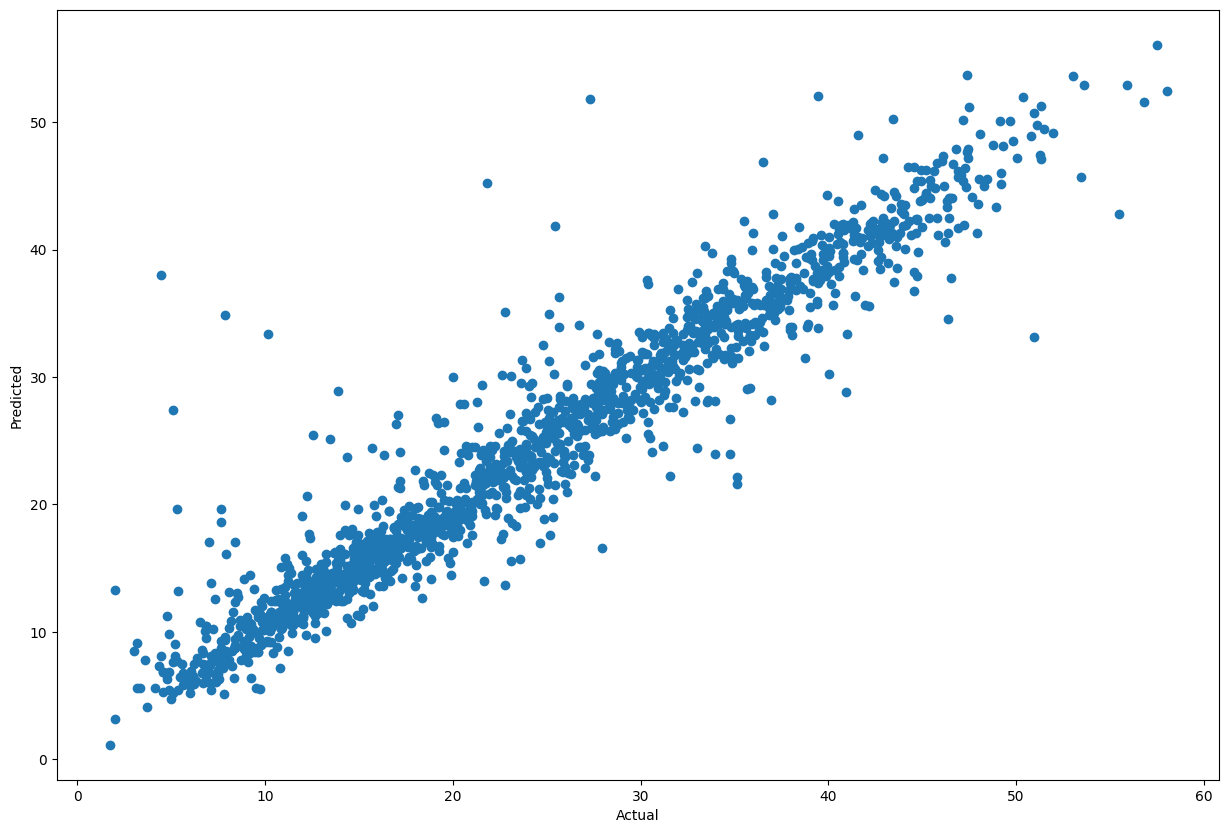

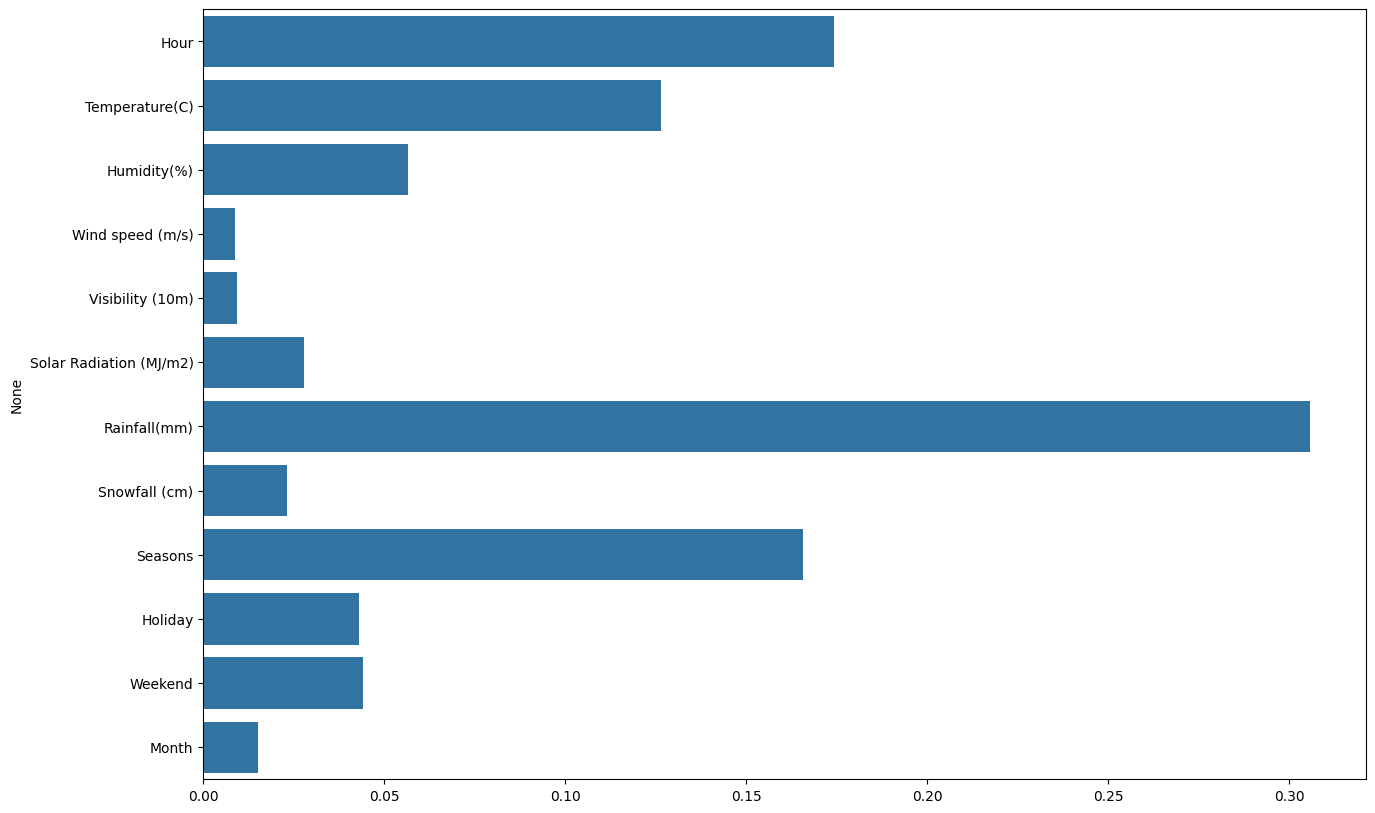

In [41]:

print('Train r2 score:',r2_score(y_train,y_train_pred))
print('Test r2 score:',r2_score(y_test,y_test_pred))

print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

#Plot actual vs predicted for the test data.
#Plot feature importance and report top 5 features (use importance_type='gain').

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.figure(figsize=(15,10))
sns.barplot(x=model.feature_importances_,y=data_features.columns)
plt.show()




In [42]:
x_dict = model.get_booster().get_score(importance_type='gain')
sorted_dict = dict(sorted(x_dict.items(), key=lambda x: x[1],reverse=True))
top_5_features = list(sorted_dict.keys())[:5]
top_5_features
# Now the top 5 features are different than before using optuna .

['Rainfall(mm)', 'Hour', 'Seasons', 'Temperature(C)', 'Humidity(%)']